## Desenso del gradiente


<IPython.core.display.Javascript object>


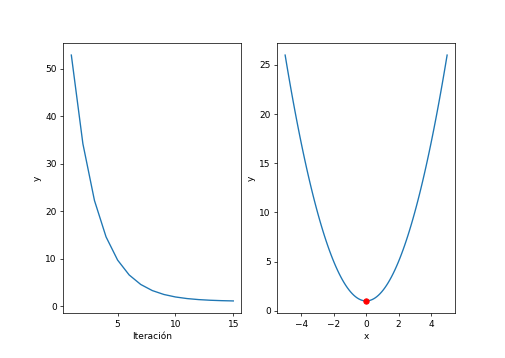

In [6]:
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy import linspace
%matplotlib notebook
# Ejemplo del gradiente descendente aplicado a la función y = x^2 + 1
# La ecuación matemática para el gradiente (derivada) es = 2*x

x_inicial = randint(10)
alpha = 0.1
n_iteraciones = 15

iteraciones = []
y = []

x = x_inicial
for i in range(n_iteraciones):
	#print('------------------------')
	#print('iteración ', str(i+1))

	# Calcular gradiente
	gradiente = 2*x

	# Actualizar "x" usando gradiente descendente
	x = x - alpha*gradiente

	# Almacenar iteración y valor correspondiente
	y.append(x**2 + 1)
	iteraciones.append(i+1)

	# Imprimir resultados
	#print('x = ', str(x), ', y = ', str(x**2+1))

plt.subplot(1,2,1)
plt.plot(iteraciones,y)
plt.xlabel('Iteración')
plt.ylabel('y')

X = linspace(-5,5,100)
Y = X**2 + 1
plt.subplot(1,2,2)
plt.plot(X,Y,0.0,1.0,'ro')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Rgresion lineal

<IPython.core.display.Javascript object>


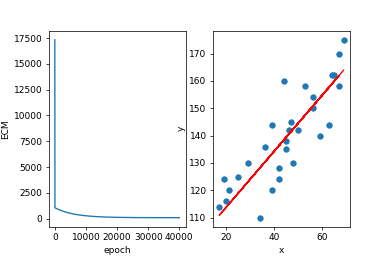

In [12]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#
# Funciones para el cálculo del gradiente descendente
# 

def calcular_modelo(w,b,x):
    '''Retorna el valor w*x+b correspondiente al modelo lineal'''
    return w*x+b

def calcular_error(y,y_):
    '''Calcula el error cuadrático medio entre el dato original (y)
       y el dato generado por el modelo (y_)'''
    N = y.shape[0]
    error = np.sum((y-y_)**2)/N
    return error

def gradiente_descendente(w_, b_, alpha, x, y):
    '''Algoritmo del gradiente descendente para minimizar el error
       cuadrático medio'''
    N = x.shape[0]      # Cantidad de datos

    # Gradientes: derivadas de la función de error con respecto
    # a los parámetros "w" y "b"
    dw = -(2/N)*np.sum(x*(y-(w_*x+b_)))
    db = -(2/N)*np.sum(y-(w_*x+b_))

    # Actualizar los pesos usando la fórmula del gradiente descendente
    w = w_ - alpha*dw
    b = b_ - alpha*db

    return w, b

#
# Leer los datos en un DataFrame de Pandas
#

datos = pd.read_csv('dataset.csv', sep=",", skiprows=32, usecols=[2,3])
#print(datos)

# Al graficar los datos se observa una tendencia lineal
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presión sistólica (mm de Mercurio)')
plt.show()

x = datos['Age'].values
y = datos['Systolic blood pressure'].values

#
# Aprender los coeficientes "w" y "b" usando el gradiente descendente
#

# Inicializar "w" y "b" aleatoriamente, definir alpha y número de iteraciones.
# En este caso se debe definir una tasa de aprendizaje muy pequeña (w=0.0004) para
# garantizar la convergencia del algoritmo


np.random.seed(2)           # Para reproducibilidad del entrenamiento
w = np.random.randn(1)[0]
b = np.random.randn(1)[0]

alpha = 0.0004
nits = 40000

# Entrenamiento
error = np.zeros((nits,1))
for i in range(nits):
    # Actualizar valor de los pesos usando el gradiente descendente
    [w, b] = gradiente_descendente(w,b,alpha,x,y)

    # Calcular el valor de la predicción
    y_ = calcular_modelo(w,b,x)

    # Actualizar el valor del error
    error[i] = calcular_error(y,y_)

    # Imprimir resultados cada 1000 epochs
    #if (i+1)%1000 == 0:
        #print("Epoch {}".format(i+1))
        #print("    w: {:.1f}".format(w), " b: {:.1f}".format(b))
        #print("    error: {}".format(error[i]))
        #print("=======================================")

# Gráfica de ECM vs iteraciones y de la regresión lineal resultante
plt.subplot(1,2,1)
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')

y_regr = calcular_modelo(w,b,x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Predicción
edad = 90
presion = calcular_modelo(w,b,edad)
#print("A los {}".format(edad), " años se tendrá una presión sanguínea de {:.1f}".format(presion))

## Regresion logistica